QUESTION:01

In [ ]:
!pip install mlxtend
!pip install mlxtend --upgrade --no-deps
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


1) Preprocess, clean and prepare the dataset based on the previous lab experience. Separate features and labels as X and Y respectively. [5 marks]

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("train.csv")

df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df=df.drop(columns=['Unnamed: 0'], axis=1)
df.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [ ]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [ ]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

<Axes: >

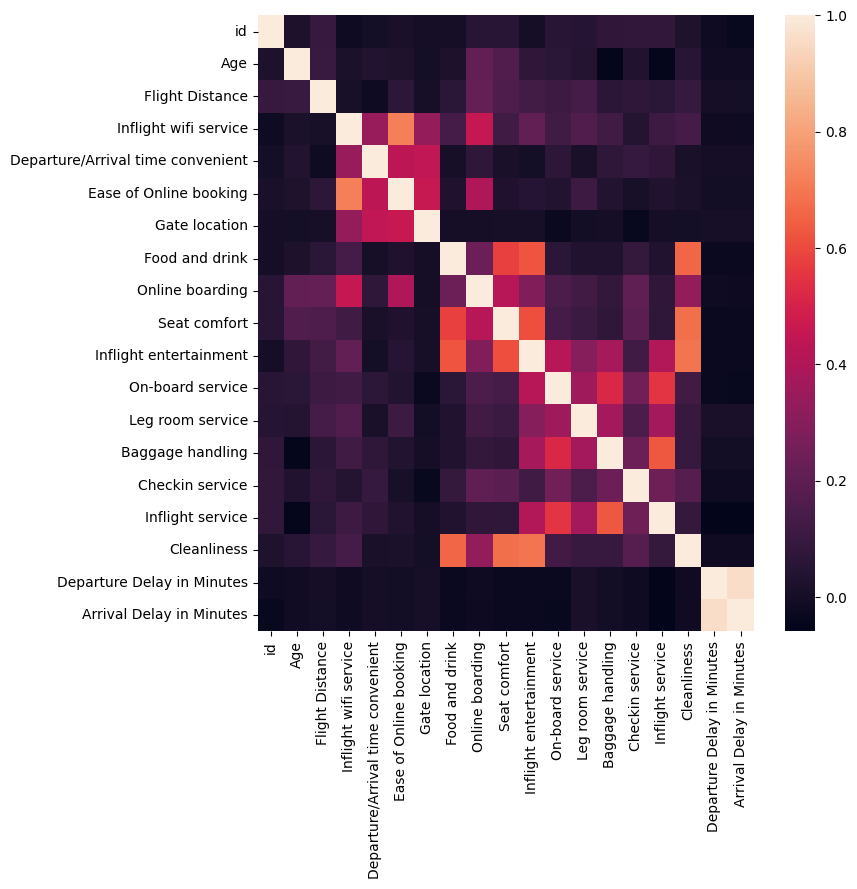

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(df.corr())

In [ ]:
print(df.head().to_string())

       id  Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  Inflight wifi service  Departure/Arrival time convenient  Ease of Online booking  Gate location  Food and drink  Online boarding  Seat comfort  Inflight entertainment  On-board service  Leg room service  Baggage handling  Checkin service  Inflight service  Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes             satisfaction
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus              460                      3                                  4                       3              1               5                3             5                       5                 4                 3                 4                4                 5            5                          25                      18.0  neutral or dissatisfied
1    5047    Male  disloyal Customer   25  Business travel  Business              235                      3                      

In [ ]:
def encoder(features,data):
  from sklearn.preprocessing import LabelEncoder
  lab_enc=LabelEncoder()
  for i in features:                
    data[i]=lab_enc.fit_transform(data[i])
  return data

features=["Gender","Customer Type","Type of Travel","Class","satisfaction"]
df = encoder(features,df)
print(df[features])

        Gender  Customer Type  Type of Travel  Class  satisfaction
0            1              0               1      2             0
1            1              1               0      0             0
2            0              0               0      0             1
3            0              0               0      0             0
4            1              0               0      0             1
...        ...            ...             ...    ...           ...
103899       0              1               0      1             0
103900       1              0               0      0             1
103901       1              1               0      0             0
103902       0              1               0      1             0
103903       1              0               0      0             0

[103904 rows x 5 columns]


In [ ]:
print(df.head().to_string())

       id  Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  Inflight wifi service  Departure/Arrival time convenient  Ease of Online booking  Gate location  Food and drink  Online boarding  Seat comfort  Inflight entertainment  On-board service  Leg room service  Baggage handling  Checkin service  Inflight service  Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction
0   70172       1              0   13               1      2              460                      3                                  4                       3              1               5                3             5                       5                 4                 3                 4                4                 5            5                          25                      18.0             0
1    5047       1              1   25               0      0              235                      3                                  2                       3         

In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['satisfaction'])
Y=df['satisfaction']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,stratify=Y)


2) Create an object of SFS by embedding the Decision Tree classifier object, providing 10 features, forward as True, floating as False and scoring = accuracy. Train SFS and report accuracy for all 10 features. Also, list the names of the 10 best features selected by SFS. [10 marks]

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC()

In [ ]:
sfs = SFS(dtc, k_features=10,verbose=2,cv=4,forward=True,floating=False, scoring='accuracy')
sfs = sfs.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    5.5s finished

[2023-03-30 10:46:13] Features: 1/10 -- score: 0.7903834308592547[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    6.0s finished

[2023-03-30 10:46:19] Features: 2/10 -- score: 0.8496881736987989[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    5.1s finished

[2023-03-30 10:46:25] Features: 3/10 -- score: 0.8912650138589467[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [ ]:
sfs.subsets_

{1: {'feature_idx': (12,),
  'cv_scores': array([0.7895365 , 0.79223129, 0.79300123, 0.78676471]),
  'avg_score': 0.7903834308592547,
  'feature_names': ('Online boarding',)},
 2: {'feature_idx': (4, 12),
  'cv_scores': array([0.84832153, 0.85120881, 0.85055436, 0.848668  ]),
  'avg_score': 0.8496881736987989,
  'feature_names': ('Type of Travel', 'Online boarding')},
 3: {'feature_idx': (4, 7, 12),
  'cv_scores': array([0.89151524, 0.89201571, 0.89232368, 0.88920542]),
  'avg_score': 0.8912650138589467,
  'feature_names': ('Type of Travel',
   'Inflight wifi service',
   'Online boarding')},
 4: {'feature_idx': (4, 7, 10, 12),
  'cv_scores': array([0.91927164, 0.92296735, 0.9223129 , 0.9223899 ]),
  'avg_score': 0.921735448105944,
  'feature_names': ('Type of Travel',
   'Inflight wifi service',
   'Gate location',
   'Online boarding')},
 5: {'feature_idx': (2, 4, 7, 10, 12),
  'cv_scores': array([0.92770249, 0.92854943, 0.92935787, 0.92958885]),
  'avg_score': 0.928799661225747,
  '

In [ ]:
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

(2, 4, 5, 7, 10, 12, 13, 14, 17, 19)
CV Score:
0.9500500461964891


In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sbs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sffs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sbfs

dtc = DTC()
sbs = SFS(dtc, k_features=10,forward=False,floating=False, scoring='accuracy',cv=4,verbose=2)
sbs = sbs.fit(X.values,Y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  1.1min finished

[2023-03-30 11:03:08] Features: 22/10 -- score: 0.9469702802587003[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   57.1s finished

[2023-03-30 11:04:05] Features: 21/10 -- score: 0.9470761472128117[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   53.3s finished

[2023-03-30 11:04:58] Features: 20/10 -- score: 0.9472301355097013[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [ ]:
sffs = SFS(dtc, k_features=10,verbose=2,cv=4,forward=True,floating=True, scoring='accuracy')
sffs = sffs.fit(X.values, Y.values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    5.7s finished

[2023-03-30 11:29:03] Features: 1/10 -- score: 0.7903834308592547[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    5.9s finished

[2023-03-30 11:29:09] Features: 2/10 -- score: 0.8496881736987989[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    4.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jo

In [ ]:
sbfs=SFS(dtc,k_features=10,verbose=2,cv=4,forward=False,floating=True,scoring='accuracy')
sbfs=sbfs.fit(X.values,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  1.1min finished

[2023-03-30 11:19:25] Features: 22/10 -- score: 0.9465179396365877[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   57.6s finished

[2023-03-30 11:20:22] Features: 21/10 -- score: 0.947355251000924[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   51.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_j

4) Visualize the output from the feature selection in a pandas DataFrame format using the get_metric_dict for all four configurations. Finally, plot the results for each configuration (from mlxtend. plotting import plot_sequential_feature_selection as plot_sfs). [10 marks]

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.7895364952263628, 0.792231290421928, 0.7930...",0.790383,"(Online boarding,)",0.003933,0.002454,0.001417
2,"(4, 12)","[0.8483215275639051, 0.8512088081305821, 0.850...",0.849688,"(Type of Travel, Online boarding)",0.001959,0.001222,0.000705
3,"(4, 7, 12)","[0.8915152448413921, 0.8920157068062827, 0.892...",0.891265,"(Type of Travel, Inflight wifi service, Online...",0.001961,0.001224,0.000706
4,"(4, 7, 10, 12)","[0.919271635355713, 0.9229673544810595, 0.9223...",0.921735,"(Type of Travel, Inflight wifi service, Gate l...",0.002316,0.001445,0.000834
5,"(2, 4, 7, 10, 12)","[0.9277024946104097, 0.9285494302433015, 0.929...",0.9288,"(Customer Type, Type of Travel, Inflight wifi ...",0.001189,0.000742,0.000428
6,"(2, 4, 7, 10, 12, 17)","[0.9393671080997844, 0.9424468740375731, 0.939...",0.941282,"(Customer Type, Type of Travel, Inflight wifi ...",0.002875,0.001793,0.001035
7,"(2, 4, 5, 7, 10, 12, 17)","[0.9463735756082537, 0.9486834000615953, 0.948...",0.94825,"(Customer Type, Type of Travel, Class, Infligh...",0.001818,0.001134,0.000655
8,"(2, 4, 5, 7, 10, 12, 17, 19)","[0.9496843239913767, 0.950146288882045, 0.9508...",0.950704,"(Customer Type, Type of Travel, Class, Infligh...",0.00149,0.000929,0.000537
9,"(2, 4, 5, 7, 10, 12, 13, 17, 19)","[0.9490298737295966, 0.9506082537727133, 0.950...",0.950637,"(Customer Type, Type of Travel, Class, Infligh...",0.001855,0.001157,0.000668
10,"(2, 4, 5, 7, 10, 12, 13, 14, 17, 19)","[0.949299353249153, 0.9500307976593779, 0.9493...",0.95005,"(Customer Type, Type of Travel, Class, Infligh...",0.001449,0.000904,0.000522


In [ ]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
23,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.943601786264244, 0.9479134585771481, 0.9460...",0.946499,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.003025,0.001887,0.00109
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9454881429011395, 0.9484524176162612, 0.945...",0.94697,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.002315,0.001444,0.000834
21,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.9461425931629196, 0.9479519556513705, 0.945...",0.947076,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.002025,0.001263,0.000729
20,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","[0.9451801663073607, 0.9488373883584847, 0.945...",0.94723,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...",0.002847,0.001776,0.001026
19,"(0, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 1...","[0.9472205112411457, 0.9495688327687096, 0.945...",0.947548,"(0, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 1...",0.002083,0.001299,0.00075
18,"(2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, ...","[0.9457191253464736, 0.9473360024638128, 0.948...",0.947278,"(2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, ...",0.001513,0.000944,0.000545
17,"(2, 3, 4, 5, 7, 8, 10, 12, 13, 14, 15, 16, 17,...","[0.9442947336002464, 0.9483369263935941, 0.944...",0.946374,"(2, 3, 4, 5, 7, 8, 10, 12, 13, 14, 15, 16, 17,...",0.003399,0.00212,0.001224
16,"(2, 3, 4, 5, 7, 10, 12, 13, 14, 15, 16, 17, 18...","[0.9467970434246997, 0.9477209732060363, 0.945...",0.947124,"(2, 3, 4, 5, 7, 10, 12, 13, 14, 15, 16, 17, 18...",0.001918,0.001197,0.000691
15,"(2, 3, 4, 5, 7, 10, 12, 13, 14, 16, 17, 18, 19...","[0.9461425931629196, 0.9462965814598091, 0.945...",0.946335,"(2, 3, 4, 5, 7, 10, 12, 13, 14, 16, 17, 18, 19...",0.001153,0.000719,0.000415
14,"(2, 3, 4, 5, 7, 10, 12, 13, 14, 16, 17, 18, 19...","[0.9451416692331382, 0.9448336926393595, 0.945...",0.945421,"(2, 3, 4, 5, 7, 10, 12, 13, 14, 16, 17, 18, 19...",0.000927,0.000578,0.000334


In [ ]:
pd.DataFrame.from_dict(sffs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.7895364952263628, 0.792231290421928, 0.7930...",0.790383,"(12,)",0.003933,0.002454,0.001417
2,"(4, 12)","[0.8483215275639051, 0.8512088081305821, 0.850...",0.849688,"(4, 12)",0.001959,0.001222,0.000705
3,"(4, 7, 12)","[0.8915152448413921, 0.8920157068062827, 0.892...",0.891265,"(4, 7, 12)",0.001961,0.001224,0.000706
4,"(4, 7, 10, 12)","[0.919271635355713, 0.9229673544810595, 0.9223...",0.921735,"(4, 7, 10, 12)",0.002316,0.001445,0.000834
5,"(2, 4, 7, 10, 12)","[0.9277024946104097, 0.9285494302433015, 0.929...",0.9288,"(2, 4, 7, 10, 12)",0.001189,0.000742,0.000428
6,"(2, 4, 7, 10, 12, 17)","[0.9393671080997844, 0.9425238681860179, 0.939...",0.941302,"(2, 4, 7, 10, 12, 17)",0.002895,0.001806,0.001043
7,"(2, 4, 5, 7, 10, 12, 17)","[0.9464505697566985, 0.94876039421004, 0.94849...",0.94826,"(2, 4, 5, 7, 10, 12, 17)",0.001745,0.001089,0.000628
8,"(2, 4, 5, 7, 10, 12, 17, 19)","[0.9496458269171543, 0.9505697566984909, 0.951...",0.950772,"(2, 4, 5, 7, 10, 12, 17, 19)",0.001272,0.000793,0.000458
9,"(2, 4, 5, 7, 12, 13, 14, 17, 19)","[0.9506467508469356, 0.9507237449953804, 0.949...",0.950858,"(2, 4, 5, 7, 12, 13, 14, 17, 19)",0.001596,0.000996,0.000575
10,"(2, 4, 5, 7, 12, 13, 14, 17, 19, 20)","[0.9511857098860487, 0.9508392362180474, 0.950...",0.951436,"(2, 4, 5, 7, 12, 13, 14, 17, 19, 20)",0.001468,0.000916,0.000529


In [ ]:
pd.DataFrame.from_dict(sbfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
23,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9438712657838004, 0.947259008315368, 0.9458...",0.946171,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.002403,0.001499,0.000865
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9451031721589159, 0.948221435170927, 0.9447...",0.946518,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.002525,0.001575,0.00091
21,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0.9457961194949184, 0.9489528795811518, 0.946...",0.947355,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...",0.002324,0.00145,0.000837
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15...","[0.9459886048660302, 0.9481444410224823, 0.945...",0.947307,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15...",0.0024,0.001497,0.000864
19,"(0, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 1...","[0.9470280258700339, 0.9484139205420388, 0.945...",0.947336,"(0, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 1...",0.002126,0.001326,0.000766
18,"(0, 2, 3, 4, 5, 7, 8, 10, 12, 13, 14, 15, 16, ...","[0.9460271019402525, 0.9489528795811518, 0.944...",0.947018,"(0, 2, 3, 4, 5, 7, 8, 10, 12, 13, 14, 15, 16, ...",0.002793,0.001742,0.001006
17,"(0, 2, 3, 4, 5, 7, 8, 10, 12, 13, 14, 16, 17, ...","[0.9477209732060363, 0.9477594702802588, 0.945...",0.946961,"(0, 2, 3, 4, 5, 7, 8, 10, 12, 13, 14, 16, 17, ...",0.001659,0.001035,0.000598
16,"(0, 2, 3, 4, 5, 7, 8, 12, 13, 14, 16, 17, 18, ...","[0.9467585463504774, 0.9485294117647058, 0.945...",0.946701,"(0, 2, 3, 4, 5, 7, 8, 12, 13, 14, 16, 17, 18, ...",0.001823,0.001137,0.000657
15,"(0, 2, 3, 4, 5, 7, 8, 12, 13, 14, 16, 17, 18, ...","[0.9459501077918078, 0.9471050200184786, 0.943...",0.945392,"(0, 2, 3, 4, 5, 7, 8, 12, 13, 14, 16, 17, 18, ...",0.002004,0.00125,0.000722
14,"(0, 2, 3, 4, 5, 7, 8, 12, 13, 14, 17, 18, 19, 20)","[0.9464890668309208, 0.9464505697566985, 0.946...",0.945825,"(0, 2, 3, 4, 5, 7, 8, 12, 13, 14, 17, 18, 19, 20)",0.001991,0.001242,0.000717


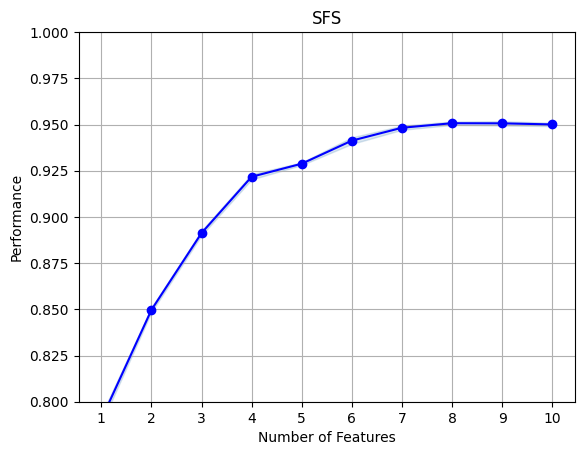

In [ ]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.8, 1])
plt.title('SFS')
plt.grid()
plt.show()

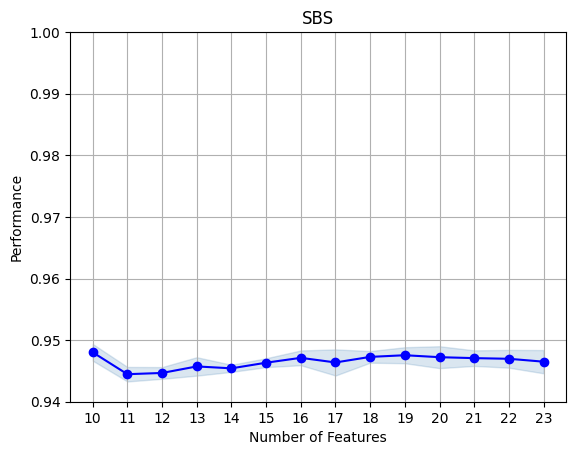

In [ ]:
fig2 = plot_sbs(sbs.get_metric_dict(), kind='std_dev')
plt.ylim([0.94, 1])
plt.title('SBS')
plt.grid()
plt.show()

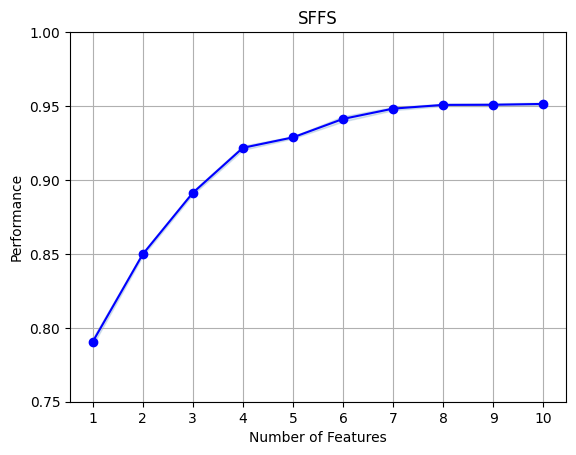

In [ ]:
fig3 = plot_sffs(sffs.get_metric_dict(), kind='std_dev')
plt.ylim([0.75, 1])
plt.title('SFFS')
plt.grid()
plt.show()

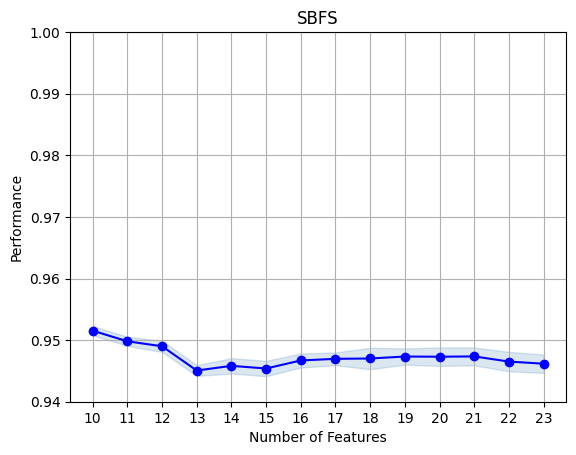

In [ ]:
fig4 = plot_sbfs(sbfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.94, 1])
plt.title('SBFS')
plt.grid()
plt.show()

5) Implement Bi-directional Feature Set Generation Algorithm from scratch. It must take a Full Set of features as well as similarity measures as input. [10 marks]

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score

#we need to implement a BFS algo from scratch

def bfs(major_Set,similarity_measure,learning_algorithm,train_set,test_set,X_test):
  #as we know that intially the feature set is the empty set

  feature_set=()
  best_performance=learning_algorithm(train_set[:, list(feature_set)],test_set,X_test)

  #now we repeat the below procedure untill convergence

  while True:
    best_new_feature = None
    best_new_performance = -np.inf
    for feature in range(major_Set.shape[1]):
      # we check that the feature is added to the feature_set or not
      if feature not in feature_set:

        # add the feature to the current feature set and calculate the similarity with the full set of features
        new_feature_set = set(feature_set) | {feature}
        similarity = similarity_measure(major_Set[:,list(new_feature_set)],major_Set)

        #calculate the performance of the model on the test_set with the training set now containg the updated features
        performance = learning_algorithm(train_set[:, list(new_feature_set)],test_set,X_test)

        #now if the feature added imporves the performance of the learning algo then assign it as the best_new_feature
        if performance > best_new_performance:
          best_new_feature = feature
          best_new_performance = performance
        

        # we also check one thing that whether forward selection imporoved the performance or not
    if best_new_performance<=best_performance:
      break

    feature_set.add(best_new_feature)
    best_performance=best_new_performance

    #now performing backward feature selection

    best_old_feature = None
    best_old_performance = -np.inf

    for feature in feature_set:

      #so we are performing the same set of function which we performed in forward selection , while in this we are just going through an elemination process
      old_feature_set=feature_set-{feature}
      similarity = similarity_measure(major_Set[:, list(old_feature_set)], major_Set)

      performance = learning_algorithm(train_set[:, list(old_feature_set)],test_set,X_test)
      #if the performance improves we update the best old feature

      if performance>best_old_performance:
        best_old_feature=feature
        best_old_performance=performance
      
    
    if best_old_performance<=best_performance:
      feature_set.remove(best_new_feature)  #this means we were not able to improve performance either by forward or backward selection
      break

    feature_set.remove(best_old_feature)
    best_performance = best_old_performance

  return major_Set[:, list(feature_set)]



def similarity_measure(major_Set, subset):
    
    similarity = np.dot(major_Set.T, subset) / np.linalg.norm(major_Set, axis=0)[:, np.newaxis]
    return similarity

def learning_algorithm(train_set,test_set,X_test):

    model =DTC()
    model.fit(X_train,Y_train)

    y_pred = model.predict(X_test)
    return accuracy_score(test_set, y_pred)


      
selected_features = bfs(df.to_numpy(), similarity_measure, learning_algorithm,X_train.to_numpy(),Y_test.to_numpy(),X_test.to_numpy())
print(selected_features)



6) Use the function implemented in part 5 and use selection criteria from the following: [10 marks]

● Accuracy Measures: using Decision Tree and SVM Classifiers

● Information Measures: Information gain

● Distance Measure: Angular Separation, Euclidian Distance and City-Block Distance

● Distance Measures. - Measures of separability, discrimination or divergence measures.
 
Themost typical is derived from the distance between the class conditional density functions.)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from scipy.spatial.distance import cdist


X_train, X_val, y_train, y_val = train_test_split(X.to_numpy(), Y.to_numpy(), test_size=0.2, random_state=42)


def information_gain(X, y):
    return mutual_info_classif(X,Y)

def accuracy_measure(X_train, y_train, X_val, y_val):
    clf = DTC(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    return accuracy_score(y_val, y_pred)

def distance_measure(X, y):
    # Angular Separation
    angle = cdist(X[y==0].mean(axis=0).reshape(1, -1), X[y==1].mean(axis=0).reshape(1, -1), metric='cosine')
    return np.array([angle])

def distance_discrimination(X, y):
    # Euclidean Distance between class conditional density functions
    mu_0 = X[y==0].mean(axis=0)
    mu_1 = X[y==1].mean(axis=0)

    sigma_0 = np.cov(X[y==0].T)
    sigma_1 = np.cov(X[y==1].T)

    dist = np.sqrt(np.sum((mu_0 - mu_1)**2) + np.sum((sigma_0 - sigma_1)**2))
    return np.array([dist])


# We use infromation gain as the selection feature
selected_features = bfs(df.to_numpy(),similarity_measure,information_gain,X_train.to_numpy(),Y_test.to_numpy(),X_test.to_numpy())
print("Selected features:", selected_features)

QUESTION 02:-


Make a Dataset of 1000 points sampled from a zero-centred gaussian distribution with a covariance matrix

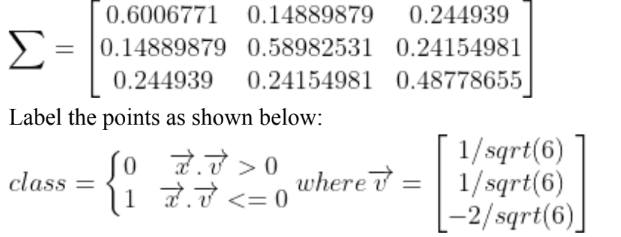

In [ ]:
import numpy as np
import plotly.graph_objects as go

mean = np.zeros(3)
cov = np.array([[0.6006771, 0.14889879 ,0.244939],
                [0.14889879, 0.58982531,0.24154981],
                [0.244939,0.24154981,0.48778655]])

data = np.random.multivariate_normal(mean, cov, size=1000)

print(data[:10])


#NOW WE NEED TO LABEL THE POINTS ACCORDING TO A RULE 

v = np.array([[0.4082482], [0.4082482], [-0.816496581]])

v_reshape = v.reshape(1, -1)

dot_products_arr = np.dot(data, v_reshape.T)
labels = np.where(dot_products_arr > 0, 0, 1)

labeled_data = np.hstack((data, labels.reshape(-1, 1)))
print(labeled_data[:5])
print(labels[:10])

arr_3d = labeled_data.reshape((labeled_data.shape[0], labeled_data.shape[1], 1))

fig = go.Figure(data=[
    go.Scatter3d(x=arr_3d[labels == 0, 0], y=arr_3d[labels == 0, 1], z=arr_3d[labels == 0, 2], mode='markers', name='Class 0'),
    go.Scatter3d(x=arr_3d[labels == 1, 0], y=arr_3d[labels == 1, 1], z=arr_3d[labels == 1, 2], mode='markers', name='Class 1'),
])


fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'), title='3D Scatter Plot')


fig.show()



[[-0.2840894   0.21236662 -0.11044507]
 [ 0.51912372 -0.66686678  0.40447626]
 [ 0.97292287  0.48191988  0.10947234]
 [-0.48541976  0.0041505  -0.44551259]
 [ 0.88271529 -1.06746304 -0.81420466]
 [-0.37037652  0.06441252 -0.56694381]
 [-0.03772674 -0.43960793 -0.32971823]
 [-0.53087871  0.2862092  -0.25175367]
 [ 1.58694214  1.91742055  1.60092778]
 [ 1.25431276  0.66629576  0.05480868]]
[[-0.2840894   0.21236662 -0.11044507  0.        ]
 [ 0.51912372 -0.66686678  0.40447626  1.        ]
 [ 0.97292287  0.48191988  0.10947234  0.        ]
 [-0.48541976  0.0041505  -0.44551259  0.        ]
 [ 0.88271529 -1.06746304 -0.81420466  0.        ]]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


IndexError: ignored

2. Apply Principal Component analysis (using sklearn) with n_components=3 on the input data X and transform the data accordingly.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

data_transformed = pca.fit_transform(data)


print("Explained variance ratio:", pca.explained_variance_ratio_)
print()
print("Cumulative sum of explained variance ratio:", np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio: [0.59702282 0.25784735 0.14512983]

Cumulative sum of explained variance ratio: [0.59702282 0.85487017 1.        ]


In [ ]:
!pip install mlxtend
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


3. Perform Complete FS on the Transformed Data with a number of features in subset =2. Fit a Decision Tree for every subset-set of features of size 2 and plot their decision boundaries superimposed with the data. [20 marks]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

feature_subsets = [('Feature 1', 0), ('Feature 2', 1), ('Feature 3', 2)]

dt_params = {'criterion': 'gini', 'max_depth': 3, 'random_state': 42}

#here we have defined the Decisiontreeclassifier as the classifier 

efs = EFS(DecisionTreeClassifier(**dt_params),min_features=2,max_features=2,scoring='accuracy',print_progress=True,cv=5)
efs = efs.fit(data_transformed, labels)

print('The best feature subset is:', efs.best_feature_names_, ' with accuracy:', efs.best_score_)



x_min, x_max = data_transformed[:, 0].min() - 1, data_transformed[:, 0].max() + 1
y_min, y_max = data_transformed[:, 1].min() - 1, data_transformed[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))

fig = go.Figure(data=go.Scatter3d(x=data_transformed[:, 0], y=data_transformed[:, 1], z=data_transformed[:, 2],mode='markers', marker=dict(color=labels, size=4)))

print(efs.subsets_)

for subset in efs.subsets_:
    print(subset)
    if len(efs.subsets_) == 2:
        indices = [x[1] for x in subset]
        features = data_transformed[:, indices]
        x_train, y_train = features, labels
        clf = DecisionTreeClassifier(**dt_params)
        clf.fit(x_train, y_train)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        fig.add_trace(go.Surface(x=xx, y=yy, z=Z, name=f'Decision Boundary ({subset[0][0]}, {subset[1][0]})'))

fig.update_layout(title='Decision Boundaries for Feature Subsets of Size 2',scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))
fig.show()



Features: 3/3

The best feature subset is: ('0', '2')  with accuracy: 0.99
{0: {'feature_idx': (0, 1), 'cv_scores': array([0.505, 0.52 , 0.505, 0.52 , 0.495]), 'avg_score': 0.509, 'feature_names': ('0', '1')}, 1: {'feature_idx': (0, 2), 'cv_scores': array([0.995, 0.995, 0.97 , 0.995, 0.995]), 'avg_score': 0.99, 'feature_names': ('0', '2')}, 2: {'feature_idx': (1, 2), 'cv_scores': array([0.98 , 0.985, 0.96 , 0.995, 0.98 ]), 'avg_score': 0.9800000000000001, 'feature_names': ('1', '2')}}
0
1
2


4. Which of the above feature subsets represents the one that can be obtained by applying PCA(n_components =2)? Explain the difference in the accuracies between this subset and other subsets by running suitable experiments. [5 marks]

The feature subset obtained by applying PCA(n_components=2) is ('Feature 1', 'Feature 2') as these are the first two principal components that explain the most variance in the data.

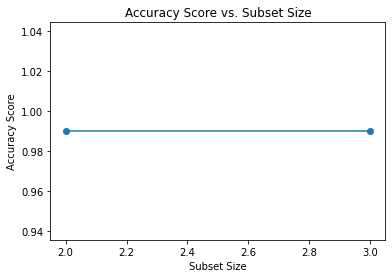

In [ ]:
import matplotlib.pyplot as plt

subset_sizes = range(2, 4)

subset_sizes_list = []
accuracy_scores = []

# Iterate over each subset size
for k in subset_sizes:
    
    efs = EFS(DecisionTreeClassifier(**dt_params),
              min_features=k,
              max_features=k,
              scoring='accuracy',
              print_progress=False,
              cv=5)
    
    
    efs = efs.fit(data_transformed, labels)
    
    subset_sizes_list.append(k)
    accuracy_scores.append(efs.best_score_)

plt.plot(subset_sizes_list, accuracy_scores, marker='o')
plt.xlabel('Subset Size')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. Subset Size')
plt.show()